
# Sleep Spindle Study

## Building Model

In this notebook, we build a model to detect the presence of sleep spindles in EEG data. This is a critical step in sleep analysis as sleep spindles are characteristic features of certain sleep stages.
        


## Imports

We will import the necessary libraries that are needed for processing the data, building the model, and evaluating its performance.
        

In [1]:

import mne
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
import json
import utils
import feature_extraction
import data_preparation
        

2023-12-19 21:26:19.979175: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 21:26:20.017724: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 21:26:20.017761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 21:26:20.018555: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 21:26:20.023962: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 21:26:20.024477: I tensorflow/core/platform/cpu_feature_guard.cc:1

### Download data

Using the `processed_data` function from the previous step to download our concatenated raw with its correspondent preprocessing and features.

In [2]:
X, labels = data_preparation.processed_data(["../dataset/train_S002_night1_hackathon_raw.mat",
                                            "../dataset/train_S003_night5_hackathon_raw.mat"],
                                            ["../dataset/train_S002_labeled.csv",
                                            "../dataset/train_S003_labeled.csv"],
                                            labels=["SS0", "SS1"], fmin=11, fmax=15)
        

Creating RawArray with float64 data, n_channels=1, n_times=4965399
    Range : 0 ... 4965398 =      0.000 ... 19861.592 secs
Ready.
labels_events.shape: (227,)
time_events.shape: (227,)
Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 626 original time points ...
0 bad epochs dropped


/app/files/utils.py:43: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


Creating RawArray with float64 data, n_channels=1, n_times=5772730
    Range : 0 ... 5772729 =      0.000 ... 23090.916 secs
Ready.
labels_events.shape: (378,)
time_events.shape: (378,)
Not setting metadata
378 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 378 events and 626 original time points ...
0 bad epochs dropped
Not setting metadata
605 matching events found
No baseline correction applied


/app/files/utils.py:43: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()
/app/files/feature_extraction.py:13: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  for epoch in epochs.get_data():
/app/files/feature_extraction.py:27: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  for epoch in epochs.get_data():
/app/files/feature_extraction.py:45: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
/app/files/feature_extraction.py:58: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  raw_data = epoc


#### Model

The chosen model is an LSTM, since we are dealing with timeframes, LSTM are known to deal well with time depending samples. A k-cross validation is implemented, partitioning the data into 5 parts and alterning between the 4 parts for training and the 1 for testing.
        

Epoch 1/50
16/16 [==============================] - 6s 38ms/step - loss: 0.6889 - accuracy: 0.5579
Epoch 2/50
16/16 [==============================] - 1s 38ms/step - loss: 0.6416 - accuracy: 0.6653
Epoch 3/50
16/16 [==============================] - 1s 38ms/step - loss: 0.5806 - accuracy: 0.7149
Epoch 4/50
16/16 [==============================] - 1s 39ms/step - loss: 0.5372 - accuracy: 0.7376
Epoch 5/50
16/16 [==============================] - 1s 35ms/step - loss: 0.5117 - accuracy: 0.7727
Epoch 6/50
16/16 [==============================] - 1s 34ms/step - loss: 0.5005 - accuracy: 0.7707
Epoch 7/50
16/16 [==============================] - 1s 39ms/step - loss: 0.4647 - accuracy: 0.8120
Epoch 8/50
16/16 [==============================] - 1s 37ms/step - loss: 0.4295 - accuracy: 0.8244
Epoch 9/50
16/16 [==============================] - 1s 35ms/step - loss: 0.3908 - accuracy: 0.8471
Epoch 10/50
16/16 [==============================] - 1s 35ms/step - loss: 0.4109 - accuracy: 0.8285
Epoch 11/

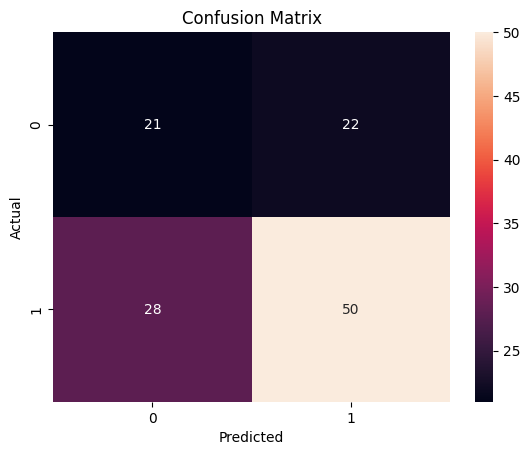

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
16/16 [==============================] - 6s 39ms/step - loss: 0.6939 - accuracy: 0.5434
Epoch 2/50
16/16 [==============================] - 1s 36ms/step - loss: 0.6443 - accuracy: 0.6591
Epoch 3/50
16/16 [==============================] - 1s 34ms/step - loss: 0.5933 - accuracy: 0.7211
Epoch 4/50
16/16 [==============================] - 1s 35ms/step - loss: 0.5493 - accuracy: 0.7521
Epoch 5/50
16/16 [==============================] - 1s 38ms/step - loss: 0.5298 - accuracy: 0.7665
Epoch 6/50
16/16 [==============================] - 1s 36ms/step - loss: 0.5252 - accuracy: 0.7789
Epoch 7/50
16/16 [==============================] - 1s 35ms/step - loss: 0.4949 - accuracy: 0.7893
Epoch 8/50
16/16 [==============================] - 1s 36ms/step - loss: 0.4502 - accuracy: 0.8079
Epoch 9/50
16/16 [==============================] - 1s 35ms/step - loss: 0.4329 - accuracy: 0.8368
Epoch 10/50
16/16 [==============================] - 1s 36ms/step - loss: 0.4100 - accuracy: 0.8409
Epoch 11/

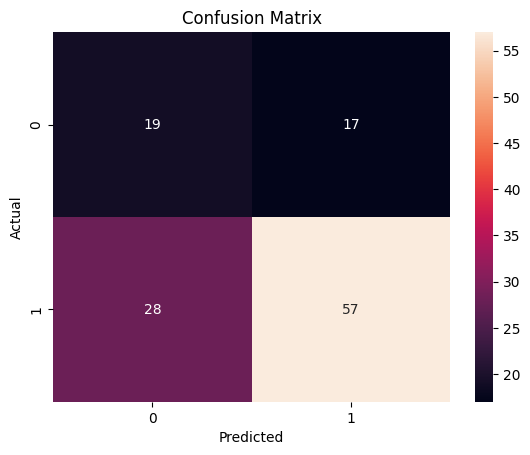

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
16/16 [==============================] - 5s 40ms/step - loss: 0.6837 - accuracy: 0.5558
Epoch 2/50
16/16 [==============================] - 1s 38ms/step - loss: 0.6370 - accuracy: 0.6715
Epoch 3/50
16/16 [==============================] - 1s 38ms/step - loss: 0.5952 - accuracy: 0.6942
Epoch 4/50
16/16 [==============================] - 1s 38ms/step - loss: 0.5466 - accuracy: 0.7438
Epoch 5/50
16/16 [==============================] - 1s 38ms/step - loss: 0.5249 - accuracy: 0.7541
Epoch 6/50
16/16 [==============================] - 1s 34ms/step - loss: 0.4930 - accuracy: 0.7686
Epoch 7/50
16/16 [==============================] - 1s 34ms/step - loss: 0.4232 - accuracy: 0.8326
Epoch 8/50
16/16 [==============================] - 1s 34ms/step - loss: 0.4038 - accuracy: 0.8347
Epoch 9/50
16/16 [==============================] - 1s 34ms/step - loss: 0.3882 - accuracy: 0.8306
Epoch 10/50
16/16 [==============================] - 1s 35ms/step - loss: 0.3493 - accuracy: 0.8657
Epoch 11/

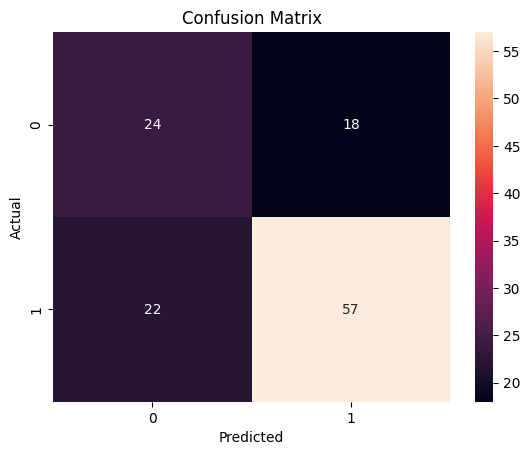

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
16/16 [==============================] - 6s 44ms/step - loss: 0.6762 - accuracy: 0.5640
Epoch 2/50
16/16 [==============================] - 1s 43ms/step - loss: 0.6233 - accuracy: 0.7045
Epoch 3/50
16/16 [==============================] - 1s 40ms/step - loss: 0.5777 - accuracy: 0.7231
Epoch 4/50
16/16 [==============================] - 1s 37ms/step - loss: 0.5525 - accuracy: 0.7417
Epoch 5/50
16/16 [==============================] - 1s 38ms/step - loss: 0.4767 - accuracy: 0.7831
Epoch 6/50
16/16 [==============================] - 1s 37ms/step - loss: 0.4991 - accuracy: 0.7645
Epoch 7/50
16/16 [==============================] - 1s 40ms/step - loss: 0.4283 - accuracy: 0.8223
Epoch 8/50
16/16 [==============================] - 1s 42ms/step - loss: 0.4142 - accuracy: 0.8409
Epoch 9/50
16/16 [==============================] - 1s 43ms/step - loss: 0.3469 - accuracy: 0.8678
Epoch 10/50
16/16 [==============================] - 1s 35ms/step - loss: 0.3204 - accuracy: 0.8657
Epoch 11/

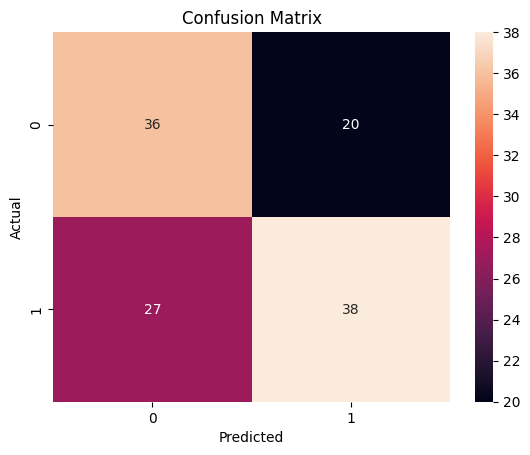

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
16/16 [==============================] - 6s 40ms/step - loss: 0.6779 - accuracy: 0.5599
Epoch 2/50
16/16 [==============================] - 1s 37ms/step - loss: 0.6386 - accuracy: 0.6550
Epoch 3/50
16/16 [==============================] - 1s 36ms/step - loss: 0.5849 - accuracy: 0.7128
Epoch 4/50
16/16 [==============================] - 1s 42ms/step - loss: 0.5339 - accuracy: 0.7562
Epoch 5/50
16/16 [==============================] - 1s 41ms/step - loss: 0.5020 - accuracy: 0.7913
Epoch 6/50
16/16 [==============================] - 1s 36ms/step - loss: 0.4602 - accuracy: 0.7955
Epoch 7/50
16/16 [==============================] - 1s 35ms/step - loss: 0.4361 - accuracy: 0.8182
Epoch 8/50
16/16 [==============================] - 1s 35ms/step - loss: 0.3994 - accuracy: 0.8306
Epoch 9/50
16/16 [==============================] - 1s 35ms/step - loss: 0.3784 - accuracy: 0.8430
Epoch 10/50
16/16 [==============================] - 1s 41ms/step - loss: 0.3864 - accuracy: 0.8450
Epoch 11/

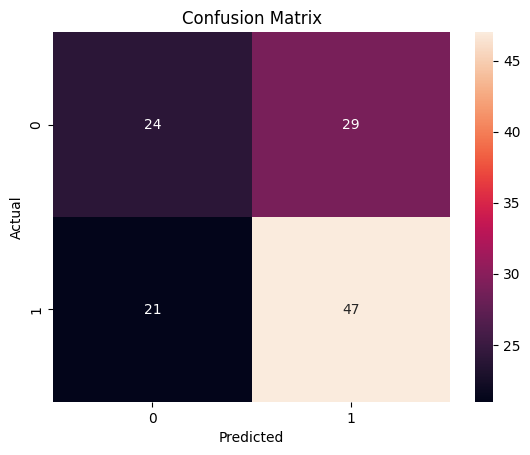

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
fold_no = 1
kfold = KFold(n_splits=5)
for train, test in kfold.split(X):
    # Define the model architecture
    model = Sequential()
    model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(20, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(20))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Generate class weights for current split
    class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
    class_weight_dict = dict(enumerate(class_weights))

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True)
    
    # Fit data to model
    history = model.fit(X[train], labels[train], epochs=50, class_weight=class_weight_dict, callbacks=[early_stopping])

    perf_metrics = utils.evaluate_model(model, X[test], labels[test])
    utils.save_model(model, history, perf_metrics, fold_no)
    # Increase fold number for next split
    fold_no = fold_no + 1

### Visualize plots and metrics

Determining the performance of the model

Plot accuracies and loss for training and validation

['addlayerSS_0Pre_1Features_LSTM_3_metrics.json', 'addlayerSS_0Pre_1Features_LSTM_4_metrics.json', 'addlayerSS_0Pre_1Features_LSTM_1_metrics.json', 'addlayerSS_0Pre_1Features_LSTM_5_metrics.json', 'addlayerSS_0Pre_1Features_LSTM_2_metrics.json']


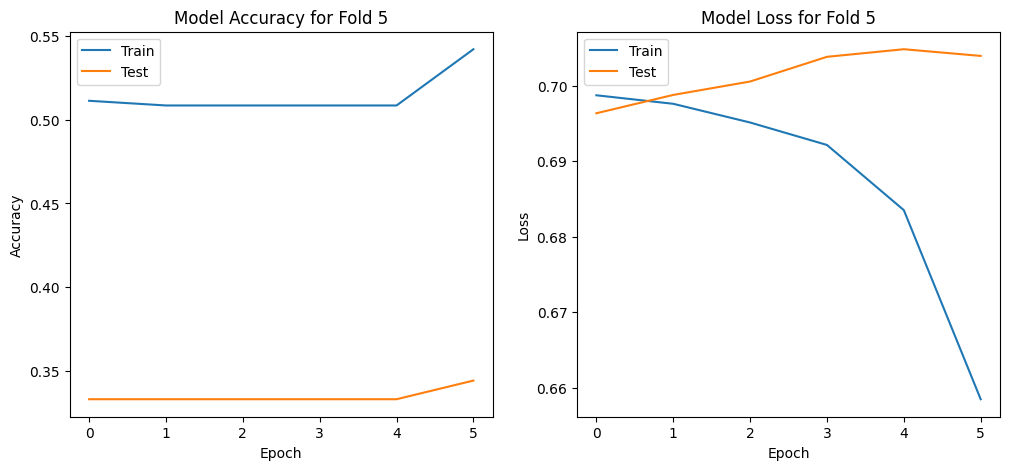

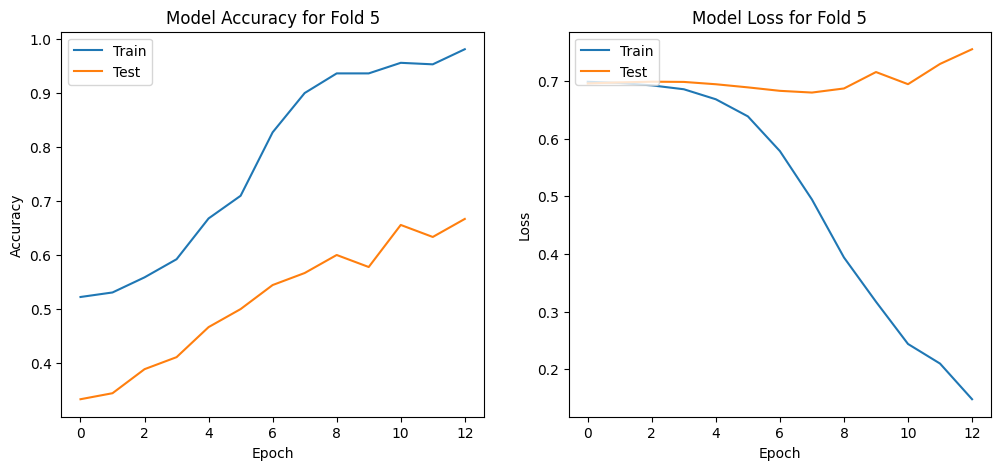

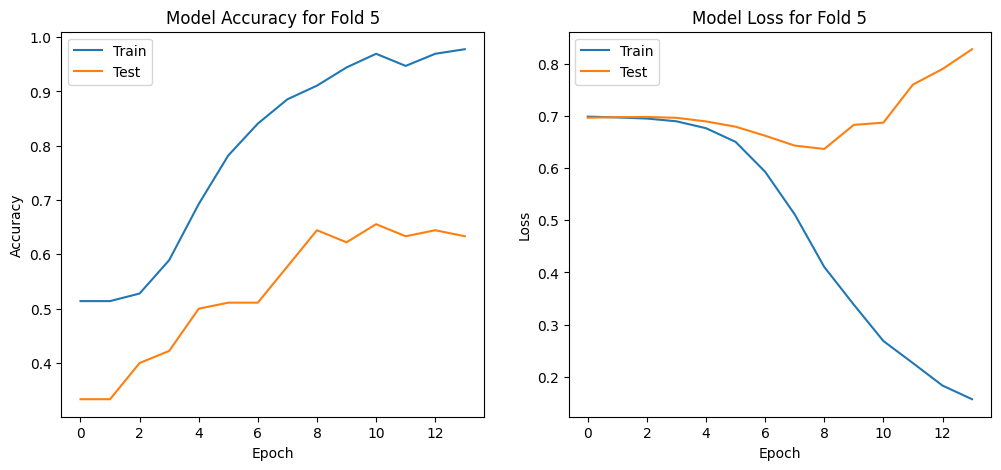

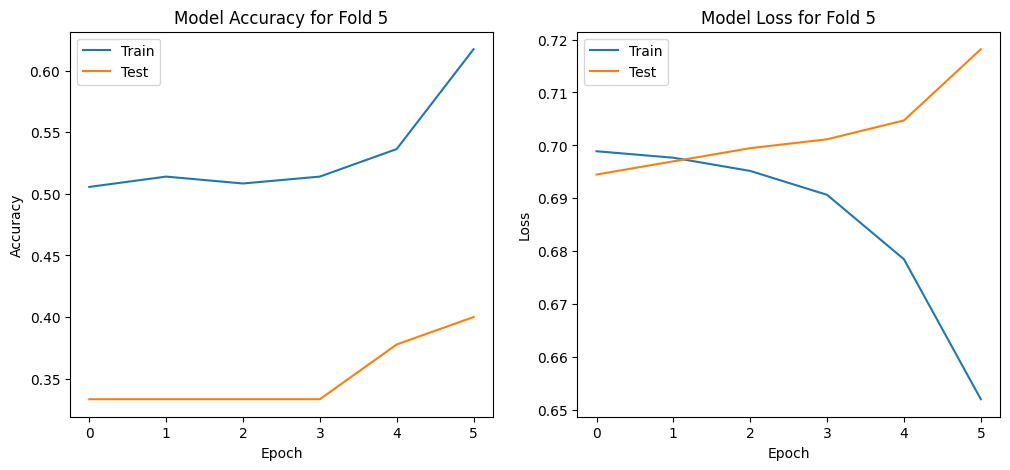

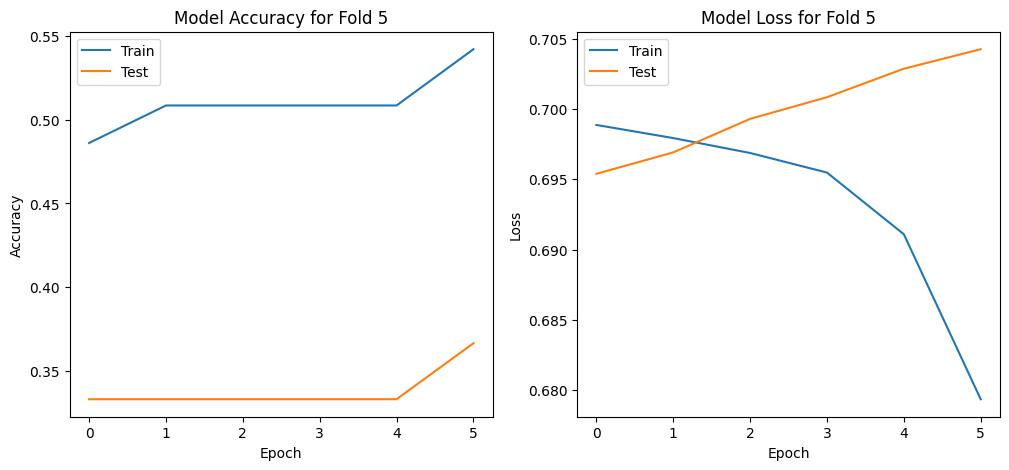

In [9]:
# filename = "SS_bp4_35Pre_0Features_LSTM_"
# filename = "SS_0Pre_0Features_LSTM_"
# filename = "SS_detrend_Pre_0Features_LSTM_"
# filename = "SS_bp11_15Pre_0Features_LSTM_"
# filename = "SS_VDM1_3Pre_0Features_LSTM_"
import os
print(os.listdir("./ressources/models/metrics"))
filenames = [
    "SS_bp4_35Pre_0Features_LSTM_",
    "SS_0Pre_0Features_LSTM_",
    "SS_detrend_Pre_0Features_LSTM_",
    "SS_bp11_15Pre_0Features_LSTM_",
    "SS_VDM1_3Pre_0Features_LSTM_"
]
for filename in filenames:
    utils.plot_fold_history(filename, 5)

Performance of each fold will be printed along with the average performance of the cross validation

In [7]:
performance = utils.print_performances("SS_bp4_35Pre_0Features_LSTM_", 1)
print(performance)

FileNotFoundError: [Errno 2] No such file or directory: 'ressources/models/metrics/SS_bp4_35Pre_0Features_LSTM_1_metrics.json'